## Real-time selective sequencing using nanopore technology. Figures and Analysis

### Introduction

This jupyter notebook requires the R kernel. 

Each figure from the manuscript "Real-time seletive sequencing using nanopore technology" is reproduced in this notebook. Figures are presented by panel and in the order in which they are considered in the manuscript.

In [1]:
library(ggplot2)
library("gridExtra")
library("plyr")

### Figure 1A
A simulated reference squiggle.

In [2]:
##Generate Perfect Model Off Reference
lambdaref=read.csv("data/fig1/Lambda_100BP.csv", header = TRUE)

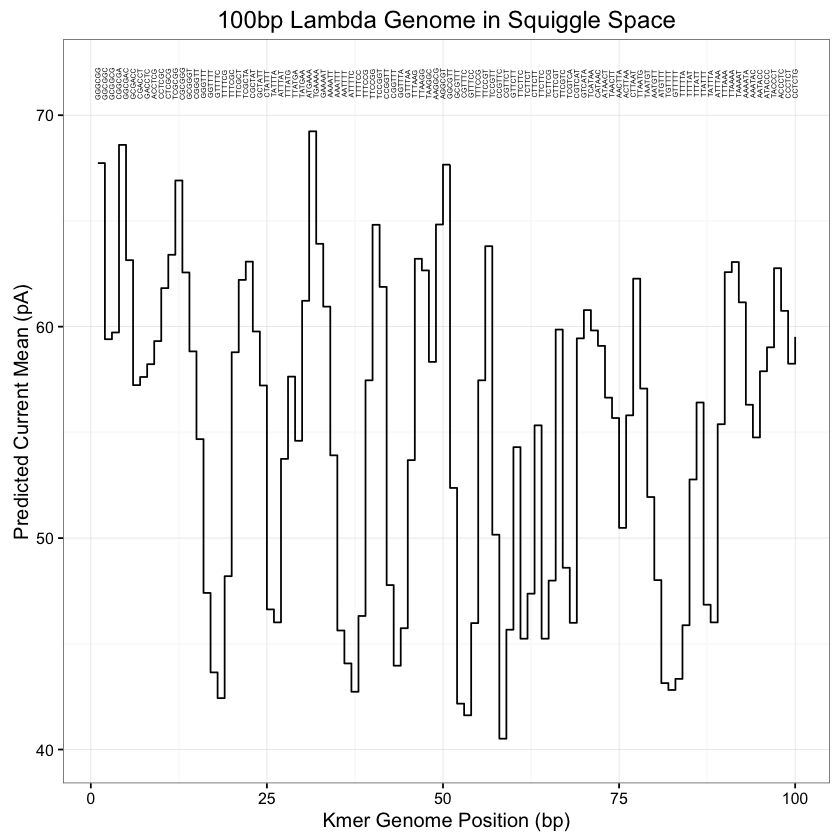

In [3]:
ggplot(data=lambdaref,aes(x=Position, y=Mean))+geom_step() + geom_text(aes(x=Position, y=71.5,label=Kmer), color='black',srt=90, size= 1.5) + theme_bw() + labs(title = "100bp Lambda Genome in Squiggle Space",x = "Kmer Genome Position (bp)", y = "Predicted Current Mean (pA)") + ylim(40,72) + xlim(1, 100)

This figure shows the first 100bp of bacteriophage lambda in squiggle space. Individual kmers are shown above each event in the squiggle.

### Figure S1

Individual reads derived from a reference are subject to shift, scale and drift variance. Here we simulate the effects of shift, scale and drift on a read.


In [4]:
datlambda1 = read.csv("data/figS1/lambda1.csv", header = TRUE)


###Shifted Data - shift the mean by +20 pA

shiftdata = datlambda1[50:200,]
shiftdata$Mean <- (shiftdata$Mean+20)



###Scaled Data - apply an extreme rescaling for illustrative purposes
scaledata = datlambda1[50:200,]
rescale <- function(x) (x-min(x))/(max(x) - min(x)) * 100
scaledata$Mean <- rescale(scaledata$Mean)



###Drift Data - apply extreme drift of 10 pA over 150 events for illustrative purposes
driftdata = datlambda1[50:200,]
driftdata$Count <- seq(from=0, to=150, by=1)
driftdata$Mean <- driftdata$Mean + (driftdata$Count/50)*10



Now we investigate the consequences of normalising each of these data sets using a simple Z-score.

In [5]:
###Z Score Normalising

#Normalise the original read.

znormdata = datlambda1[50:200,]
znormdata$Mean <- (znormdata$Mean - mean(znormdata$Mean))/sd(znormdata$Mean)

#Normalise the shifted read
znormshift = shiftdata
znormshift$Mean <- (znormshift$Mean - mean(znormshift$Mean))/sd(znormshift$Mean)

#Normalise the scaled read
znormscale = scaledata
znormscale$Mean <- (znormscale$Mean - mean(znormscale$Mean))/sd(znormscale$Mean)

#Normalise the drift read
znormdrift = driftdata
znormdrift$Mean <- (znormdrift$Mean - mean(znormdrift$Mean))/sd(znormdrift$Mean)


Now we plot the 8 datasets:

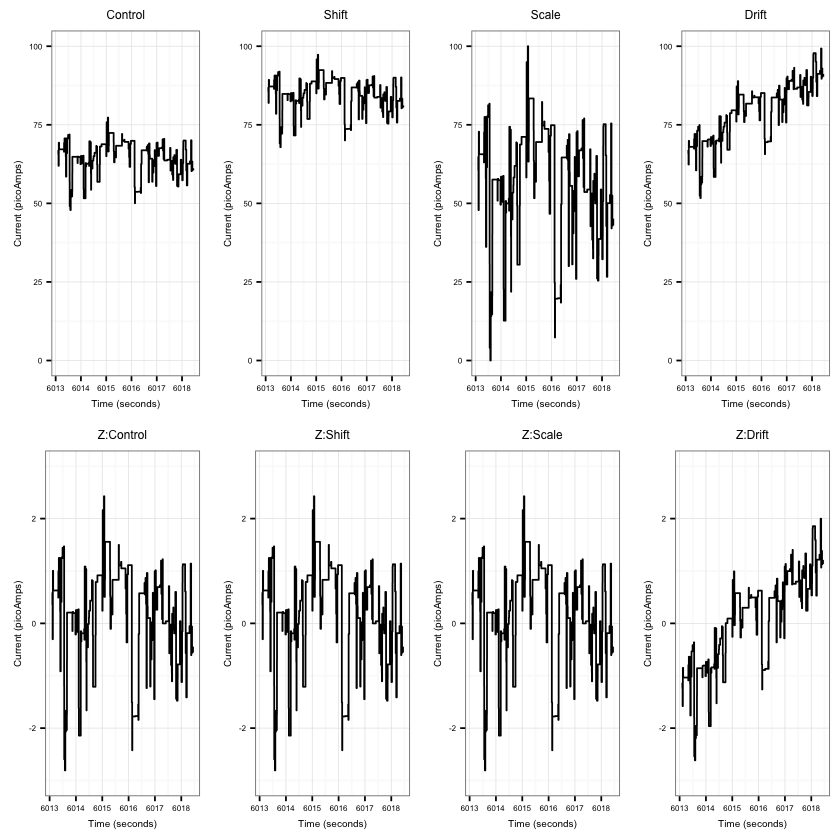

In [6]:
S1A<-ggplot(data=datlambda1[50:200,], aes(x=Time, y=Mean) )+geom_step()+labs(title = "Control",x = "Time (seconds)")+labs(y="Current (picoAmps)") + theme_bw() + theme(text = element_text(size=6)) + ylim(0,100)
S1B<-ggplot(data=shiftdata, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Shift",x = "Time (seconds)")+labs(y="Current (picoAmps)") + theme_bw() + theme(text = element_text(size=6))+ ylim(0,100)
S1C<-ggplot(data=scaledata, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Scale",x = "Time (seconds)")+labs(y="Current (picoAmps)") + theme_bw() + theme(text = element_text(size=6))+ ylim(0,100)
S1D<-ggplot(data=driftdata, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Drift",x = "Time (seconds)")+labs(y="Current (picoAmps)") + theme_bw() + theme(text = element_text(size=6))+ ylim(0,100)
S1E<-ggplot(data=znormdata, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Z:Control",x = "Time (seconds)")+labs(y="Current (picoAmps)")+ theme_bw() + theme(text = element_text(size=6))+ ylim(-3,3)
S1F<-ggplot(data=znormshift, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Z:Shift",x = "Time (seconds)")+labs(y="Current (picoAmps)")+ theme_bw() + theme(text = element_text(size=6))+ ylim(-3,3)
S1G<-ggplot(data=znormscale, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Z:Scale",x = "Time (seconds)")+labs(y="Current (picoAmps)")+ theme_bw() + theme(text = element_text(size=6))+ ylim(-3,3)
S1H<-ggplot(data=znormdrift, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Z:Drift",x = "Time (seconds)")+labs(y="Current (picoAmps)")+ theme_bw() + theme(text = element_text(size=6))+ ylim(-3,3)
grid.arrange(S1A, S1B, S1C, S1D,S1E,S1F,S1G,S1H, nrow=2,ncol=4)

### Figure 1 B,C

Next we consider the impact of in/dels with respect to events on real reads in nanopore data. This is the motivation for considering Dynamic Time Warping for mapping reads to reference.

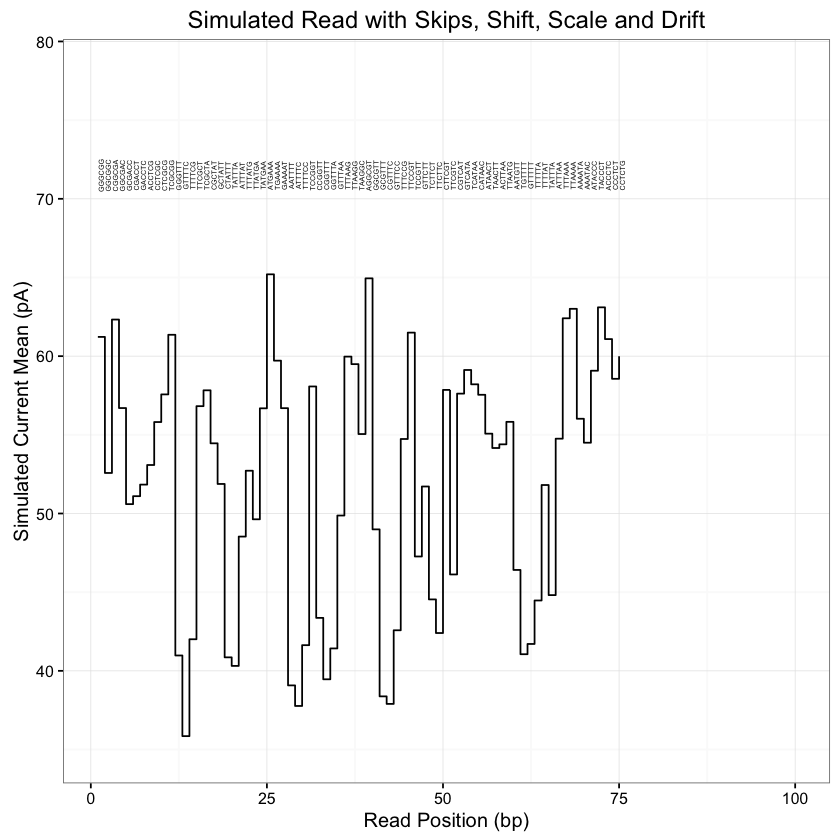

In [7]:
##Simulate skipped events by deleting 25 random rows from data set
lambdadel = lambdaref[-sample(1:nrow(lambdaref), 25), ]
##Generate Corrected Positions for the new read
z<- seq(1, length.out=nrow(lambdadel), by=1)
lambdadel <- cbind(CorrectedPos=z,lambdadel)
ggplot(data=lambdadel,aes(x=CorrectedPos, y=((Mean*1.05)+(0.1*CorrectedPos))-10))+geom_step() + geom_text(aes(x=CorrectedPos+0.5, y=71.5,label=Kmer), color='black',srt=90, size= 1.5) + theme_bw() + labs(title = "Simulated Read with Skips, Shift, Scale and Drift",x = "Read Position (bp)", y = "Simulated Current Mean (pA)") + xlim(1, 100) + ylim(35,78)

#### Figure 1B - showing the effective truncation of a read with skips (i.e deleted events)

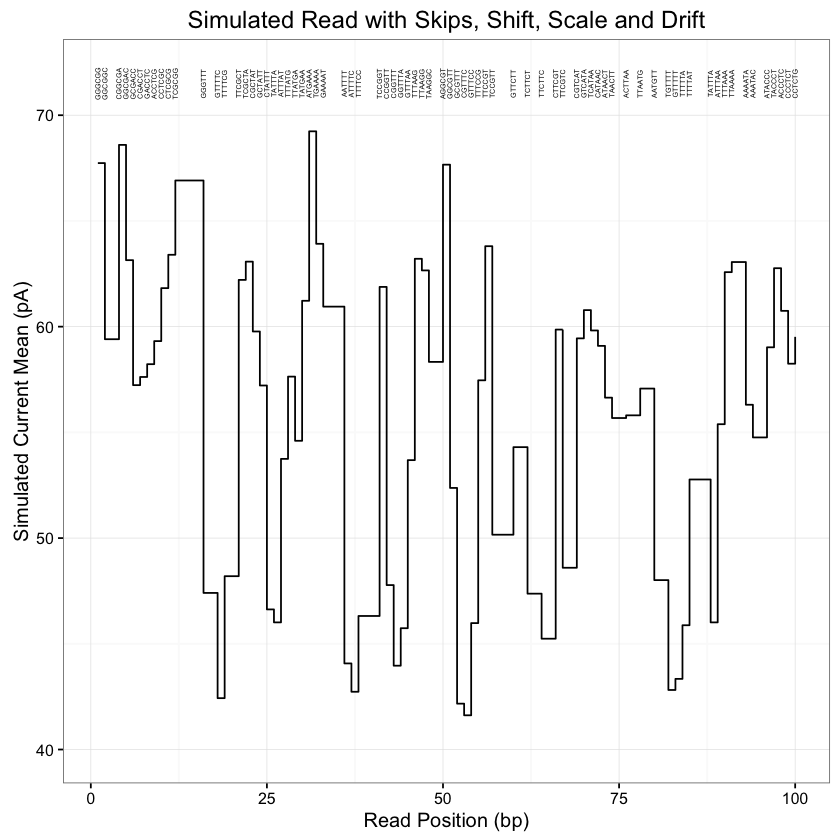

In [8]:
ggplot(data=lambdadel,aes(x=Position, y=Mean))+geom_step() + geom_text(aes(x=Position, y=71.5,label=Kmer), color='black',srt=90, size= 1.5) + theme_bw() + labs(title = "Simulated Read with Skips, Shift, Scale and Drift",x = "Read Position (bp)", y = "Simulated Current Mean (pA)") + xlim(1, 100) + ylim(40,72)


#### Figure 1C showing the same read as 1B corrected for skips.

### Figure S2 - Investigating the ability of DTW to place reads with respect to a reference.

In [9]:
fname = 'data/figs2/out.txt'

par(mfrow=c(4,2))

#summary(a)
titles =   c( 'Lambda Synthetic Reads' , 'Lambda Amp3 Reads RU21' )

normText = c("Un-normalised", "Normalised")

letters = c("A", "B", "C", "D", "E", "F", "G", "H")

a<-read.table(file=fname, sep=',', header=F)


colnames(a) <- c(
"ReadFolder", "Normalise", "Chapter", "File", "Amplicon"
        , "winSz", "Len", "qrySz", "Offset"
        , "Read", "Ref", "Time_t", "trg", "Pos", "outBy", "read_t_Success"
        , "Read_", "Ref_", "Time_c", "trg_", "Pos_", "outBy", "read_c_Success_"
        , "dim", "quasi2d"
        )

a$Time <- a$Time_t + a$Time_c
a$ReadFolder <- factor(a$ReadFolder)
a$Normalise <- factor(a$Normalise)
folders = rev(levels(a$ReadFolder))
normalisations = levels(a$Normalise)
j=1
for (n in normalisations) {
for (f in folders) {


folderNum = which(folders == f)
normNum = which(normalisations == n)
b <- a[ a$ReadFolder == f & a$Normalise == n & a$read_t_Success==' True', ]

#print(f)

if (f=="synthetic") numReads=100 else numReads=48
#print(numReads)

#attach(b)
#summary(b)
x0 <- xtabs(~winSz+Read+Ref+winSz)
#print(x0)




ftable(x0, col.vars=c(2,3))


xc <- xtabs(~winSz) 
#print(xc)

xt <- xtabs(Time~winSz)
#print(xt)
m <- as.matrix(t(xc))/numReads*100
#print(m)
txt <- paste( letters[j], ") ", titles[folderNum], ", ", normText[normNum], sep="" )
#print(txt)
barplot(m, ylim=c(0,110), col='grey',ylab='Aligned Reads (%)', xlab='Window Size', main=txt)
grid()
j=j+1

m <- as.matrix(t(xt))
#barplot(m, plot=F)
#txt <- paste( letters[j], titles[folderNum], normText[normNum], sep=": " )
txt <- paste( letters[j], ") ", titles[folderNum], ", ", normText[normNum], sep="" )
#print(txt)
barplot(m, col='grey',ylab='Time (seconds)', xlab='Window Size', main=txt)
grid()
j=j+1

}}

ERROR: Error in eval(expr, envir, enclos): object 'winSz' not found


## Selective Enrichment of Targeted Regions of the Lambda Genome

### Figure 2A - 30b/s enrichment over the lambda genome.

Here we show enrichment over two 5 kb regions (10-15 kb and 30-35 kb) sequencing with SQK5 chemistry (30 b/s) and applying read until only to the even numbered channels.


In [10]:
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_Template.txt",intern=FALSE)

In [11]:
EVEN_RU7_Template = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_Template.txt", header = FALSE,sep="\t")
EVEN_RU7_Complement = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_Complement.txt", header = FALSE,sep="\t")
EVEN_RU7_2D = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_2D.txt", header = FALSE,sep="\t")

ODD_RU7_Template = read.csv("data/fig2/RU7/ODD/ODD_RU7_Template.txt", header = FALSE,sep="\t")
ODD_RU7_Complement = read.csv("data/fig2/RU7/ODD/ODD_RU7_Complement.txt", header = FALSE,sep="\t")
ODD_RU7_2D = read.csv("data/fig2/RU7/ODD/ODD_RU7_2D.txt", header = FALSE,sep="\t")

ALL_RU7_Template = read.csv("data/fig2/RU7/ALL/ALL_RU7_Template.txt", header = FALSE,sep="\t")
ALL_RU7_Complement = read.csv("data/fig2/RU7/ALL/ALL_RU7_Complement.txt", header = FALSE,sep="\t")
ALL_RU7_2D = read.csv("data/fig2/RU7/ALL/ALL_RU7_2D.txt", header = FALSE,sep="\t")


RU7<-cbind(EVEN_RU7_Template,EVEN_RU7_Complement$V3,EVEN_RU7_2D$V3,ODD_RU7_Template$V3,ODD_RU7_Complement$V3,ODD_RU7_2D$V3,ALL_RU7_Template$V3,ALL_RU7_Complement$V3,ALL_RU7_2D$V3)
colnames(RU7) <- c("Ref", "Position","E_Template","E_Complement","E_2D","O_Template","O_Complement","O_2D","A_Template","A_Complement","A_2D")


## We import a file containing the read lengths for 2D sequences in this library:
RU7_lengths = read.csv("data/fig2/RU7/ALL/2Dlengths.txt",header = FALSE,sep="\t")
RU7_lengths <- cbind(RU7_lengths,type="2D")


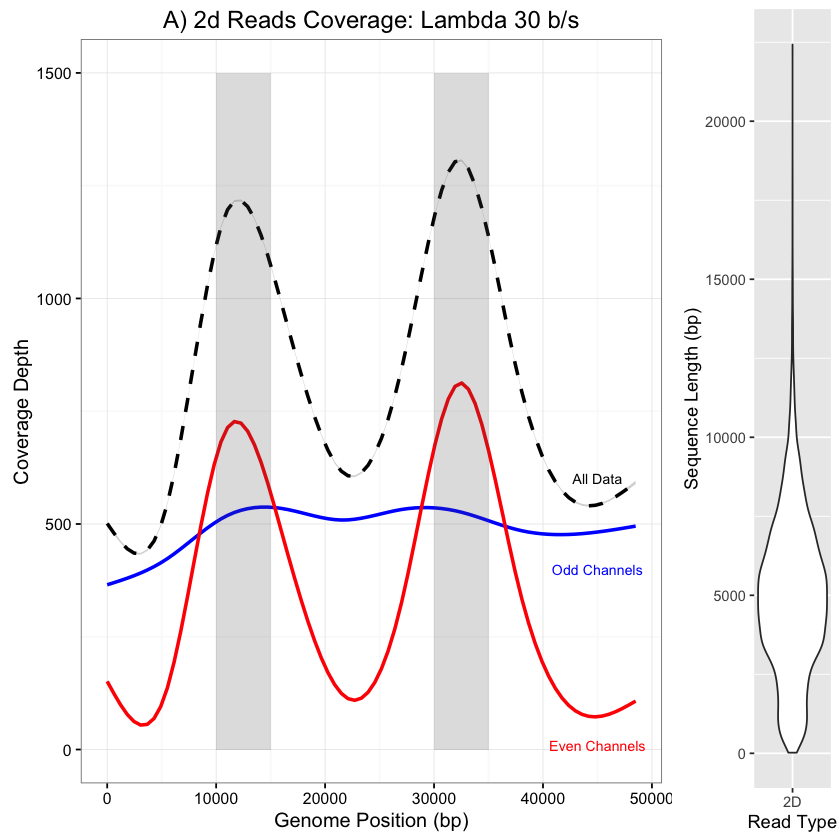

In [12]:
Fig2Ai<-ggplot(data=RU7,aes(x=Position,y=E_2D)) + theme_bw() +geom_smooth(aes(x=Position,y=O_2D),size = 1, color="blue")+geom_smooth(aes(x=Position,y=E_2D),size = 1, color="red") + geom_smooth(aes(x=Position,y=A_2D),size = 1, color="black",linetype="dashed") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "A) 2d Reads Coverage: Lambda 30 b/s") + annotate("text", x = 45000, y = 10, label = "Even Channels", color = "red",size=3)+ annotate("text", x = 45000, y = 400, label = "Odd Channels", color = "blue",size=3) + annotate("text", x = 45000, y = 600, label = "All Data", color = "Black",size=3) + annotate("rect", xmin = 10000, xmax = 15000,ymin=0,ymax=1500,alpha = .2) + annotate("rect", xmin = 30000, xmax = 35000,ymin=0,ymax=1500,alpha = .2)
Fig2Aii<-ggplot(data=RU7_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Ai,Fig2Aii,       ncol=2, nrow=1, widths=c(16, 4))

### Figure 2B - 70b/s enrichment over the lambda genome.

Here we show enrichment over two 5 kb regions (10-15 kb and 35-40 kb) sequencing with SQK6 chemistry (70 b/s) and applying read until only to the even numbered channels.



In [13]:
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_Template.txt",intern=FALSE)

In [14]:
EVEN_RU9_Template = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_Template.txt", header = FALSE,sep="\t")
EVEN_RU9_Complement = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_Complement.txt", header = FALSE,sep="\t")
EVEN_RU9_2D = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_2D.txt", header = FALSE,sep="\t")

ODD_RU9_Template = read.csv("data/fig2/RU9/ODD/ODD_RU9_Template.txt", header = FALSE,sep="\t")
ODD_RU9_Complement = read.csv("data/fig2/RU9/ODD/ODD_RU9_Complement.txt", header = FALSE,sep="\t")
ODD_RU9_2D = read.csv("data/fig2/RU9/ODD/ODD_RU9_2D.txt", header = FALSE,sep="\t")

ALL_RU9_Template = read.csv("data/fig2/RU9/ALL/ALL_RU9_Template.txt", header = FALSE,sep="\t")
ALL_RU9_Complement = read.csv("data/fig2/RU9/ALL/ALL_RU9_Complement.txt", header = FALSE,sep="\t")
ALL_RU9_2D = read.csv("data/fig2/RU9/ALL/ALL_RU9_2D.txt", header = FALSE,sep="\t")


RU9<-cbind(EVEN_RU9_Template,EVEN_RU9_Complement$V3,EVEN_RU9_2D$V3,ODD_RU9_Template$V3,ODD_RU9_Complement$V3,ODD_RU9_2D$V3,ALL_RU9_Template$V3,ALL_RU9_Complement$V3,ALL_RU9_2D$V3)
colnames(RU9) <- c("Ref", "Position","E_Template","E_Complement","E_2D","O_Template","O_Complement","O_2D","A_Template","A_Complement","A_2D")


## We import a file containing the read lengths for 2D sequences in this library:
RU9_lengths = read.csv("data/fig2/RU9/ALL/2Dlengths.txt",header = FALSE,sep="\t")
RU9_lengths <- cbind(RU9_lengths,type="2D")

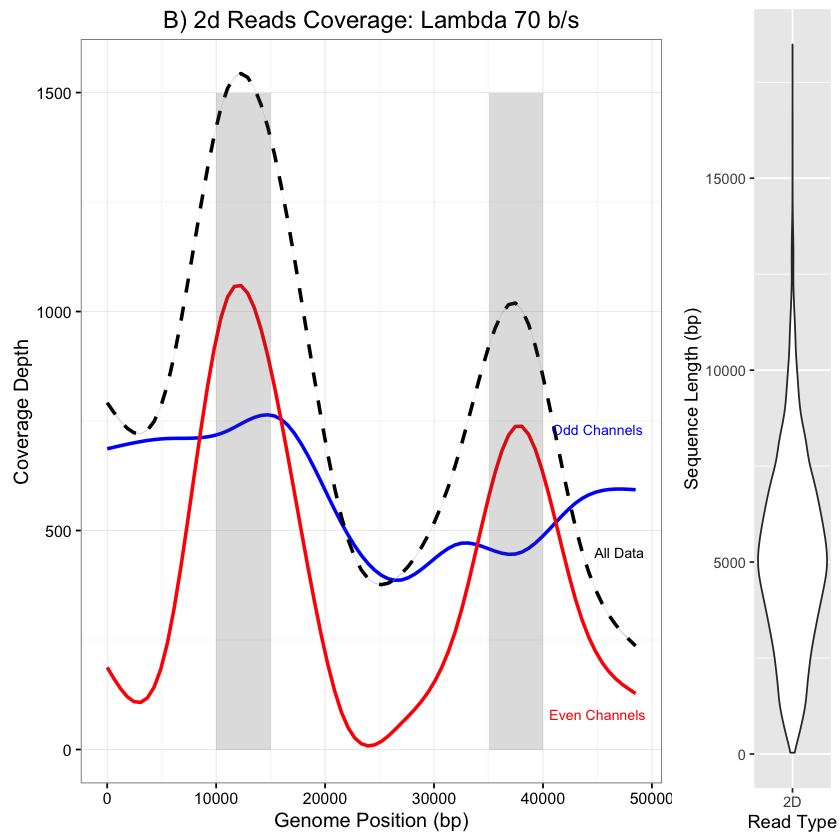

In [15]:
Fig2Bi<-ggplot(data=RU9,aes(x=Position,y=E_2D)) + theme_bw() +geom_smooth(aes(x=Position,y=O_2D),size = 1, color="blue")+geom_smooth(aes(x=Position,y=E_2D),size = 1, color="red") + geom_smooth(aes(x=Position,y=A_2D),size = 1, color="black",linetype="dashed") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "B) 2d Reads Coverage: Lambda 70 b/s") + annotate("text", x = 45000, y = 80, label = "Even Channels", color = "red",size=3)+ annotate("text", x = 45000, y = 730, label = "Odd Channels", color = "blue",size=3) + annotate("text", x = 47000, y = 450, label = "All Data", color = "Black",size=3) + annotate("rect", xmin = 10000, xmax = 15000,ymin=0,ymax=1500,alpha = .2) + annotate("rect", xmin = 35000, xmax = 40000,ymin=0,ymax=1500,alpha = .2)
Fig2Bii<-ggplot(data=RU9_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Bi,Fig2Bii,       ncol=2, nrow=1, widths=c(16, 4))

### Figure 2C - 70b/s enrichment over the lambda genome - single peak.

Here we show enrichment over one 10 kb regions (15-25 kb) sequencing with SQK6 chemistry (70 b/s) and applying read until to all the channels.


In [16]:
system("genomeCoverageBed -ibam data/fig2/RU11/ALL/ALL_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL/ALL_RU11_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU11/ALL/ALL_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL/ALL_RU11_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU11/ALL/ALL_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL/ALL_RU11_Template.txt",intern=FALSE)

In [17]:
ALL_RU11_Template = read.csv("data/fig2/RU11/ALL_RU11_Template.txt", header = FALSE,sep="\t")
ALL_RU11_Complement = read.csv("data/fig2/RU11/ALL_RU11_Complement.txt", header = FALSE,sep="\t")
ALL_RU11_2D = read.csv("data/fig2/RU11/ALL_RU11_2D.txt", header = FALSE,sep="\t")

RU11<-cbind(ALL_RU11_Template,ALL_RU11_Complement$V3,ALL_RU11_2D$V3)
colnames(RU11) <- c("Ref", "Position","Template","Complement","R2D")
RU11_lengths = read.csv("data/fig2/RU11/2Dlengths.txt",header = FALSE,sep="\t")
RU11_lengths <- cbind(RU11_lengths,type="2D")

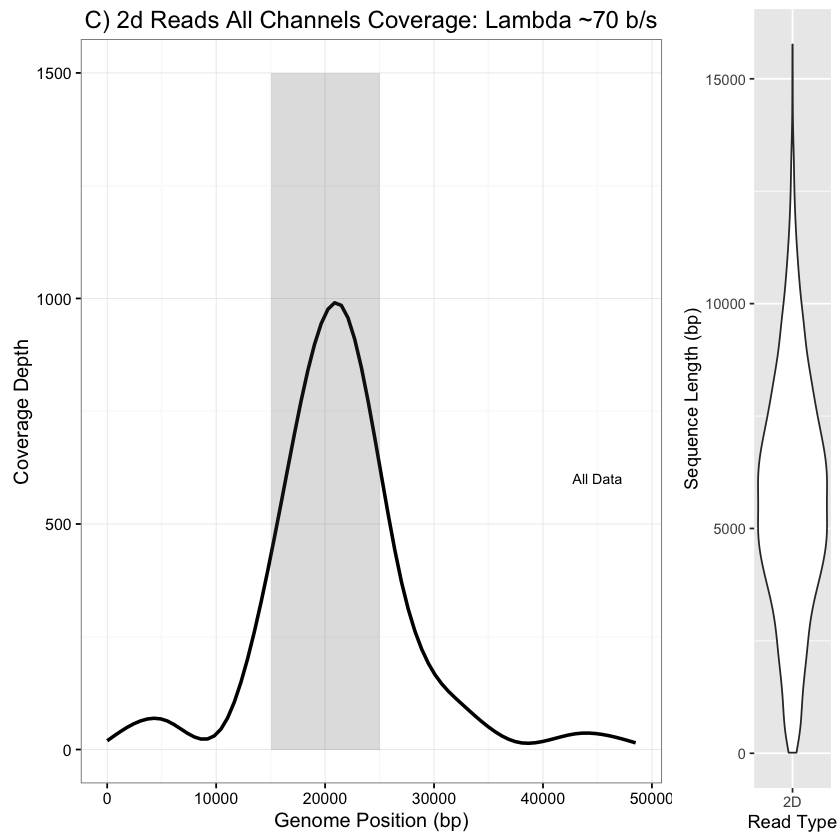

In [18]:
Fig2Ci<-ggplot(data=RU11,aes(x=Position,y=R2D)) + theme_bw() +geom_smooth(aes(x=Position,y=R2D),size = 1, color="black") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "C) 2d Reads All Channels Coverage: Lambda ~70 b/s")  + annotate("rect", xmin = 15000, xmax = 25000,ymin=0,ymax=1500,alpha = .2)+ annotate("text", x = 45000, y = 600, label = "All Data", color = "Black",size=3)
Fig2Cii<-ggplot(data=RU11_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Ci,Fig2Cii,       ncol=2, nrow=1, widths=c(16, 4))

### Figure 3 - Selective Sequencing of Amplicons

In [23]:
##First collect the data from the BAM files to process.
NO_RU_2D = read.csv("data/fig3/NO_RU/NO_RU_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")
NO_RU_Complement = read.csv("data/fig3/NO_RU/NO_RU_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
NO_RU_Template = read.csv("data/fig3/NO_RU/NO_RU_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")

RU_dudu_2D = read.csv("data/fig3/RU_dudu/RU_dudu_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")
RU_dudu_Complement = read.csv("data/fig3/RU_dudu/RU_dudu_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
RU_dudu_Template = read.csv("data/fig3/RU_dudu/RU_dudu_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")

RU_udud_2D = read.csv("data/fig3/RU_udud/RU_udud_2D.txt_in_50_windows.txt", header = FALSE,sep="\t")
RU_udud_Complement = read.csv("data/fig3/RU_udud/RU_udud_Complement.txt_in_50_windows.txt", header = FALSE,sep="\t")
RU_udud_Template = read.csv("data/fig3/RU_udud/RU_udud_Template.txt_in_50_windows.txt", header = FALSE,sep="\t")


NO_RU_2D <-cbind(NO_RU_2D,Type="2d")
NO_RU_Complement <-cbind(NO_RU_Complement,Type="Complement")
NO_RU_Template <-cbind(NO_RU_Template,Type="Template")
NO_RU<-rbind(NO_RU_2D,NO_RU_Complement,NO_RU_Template)

colnames(NO_RU) <- c("Ref", "Position","Depth","Type")
NO_RU<-cbind(NO_RU,Experiment="A) No Read Until Applied")

RU_udud_2D <-cbind(RU_udud_2D,Type="2d")
RU_udud_Complement <-cbind(RU_udud_Complement,Type="Complement")
RU_udud_Template <-cbind(RU_udud_Template,Type="Template")
RU_udud<-rbind(RU_udud_2D,RU_udud_Complement,RU_udud_Template)

colnames(RU_udud) <- c("Ref", "Position","Depth","Type")
RU_udud<-cbind(RU_udud,Experiment="B) Selecting Odd Numbered Amplicons")

RU_dudu_2D <-cbind(RU_dudu_2D,Type="2d")
RU_dudu_Complement <-cbind(RU_dudu_Complement,Type="Complement")
RU_dudu_Template <-cbind(RU_dudu_Template,Type="Template")
RU_dudu<-rbind(RU_dudu_2D,RU_dudu_Complement,RU_dudu_Template)

#RU_dudu<-cbind(RU_dudu_Template,RU_dudu_Complement$V3,RU_dudu_2D$V3)
colnames(RU_dudu) <- c("Ref", "Position","Depth","Type")
RU_dudu<-cbind(RU_dudu,Experiment="C) Selecting Even Numbered Amplicons")
Amplicons <-rbind(NO_RU,RU_udud,RU_dudu)

#### Showing template, complement and 2D data

Warning message:
: Removed 79356 rows containing missing values (geom_path).

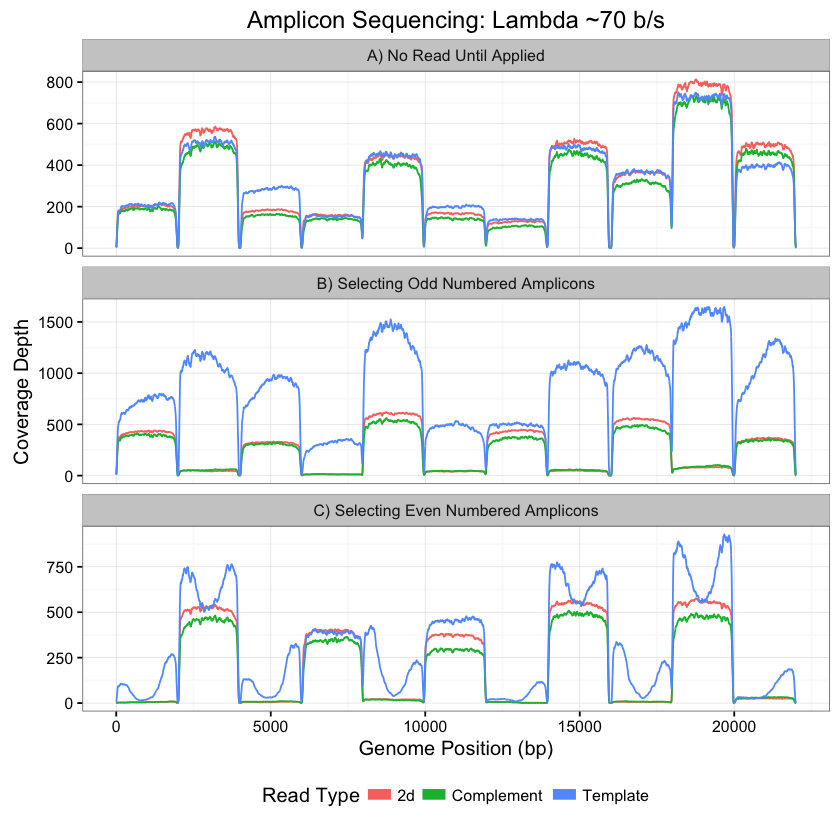

In [24]:
ggplot(data=Amplicons,aes(x=Position,y=Depth,color=Type)) + theme_bw()  + geom_line(size=0.5)+ labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "Amplicon Sequencing: Lambda ~70 b/s")   + xlim(0,22000) + facet_wrap(~Experiment,ncol=1,scales="free_y") + scale_colour_discrete(name  = "Read Type") + theme(legend.position="bottom" , legend.key = element_blank() ) + guides(colour = guide_legend(override.aes = list(size=3)))

#### Showing just 2D data.


Warning message:
: Removed 26452 rows containing missing values (geom_path).

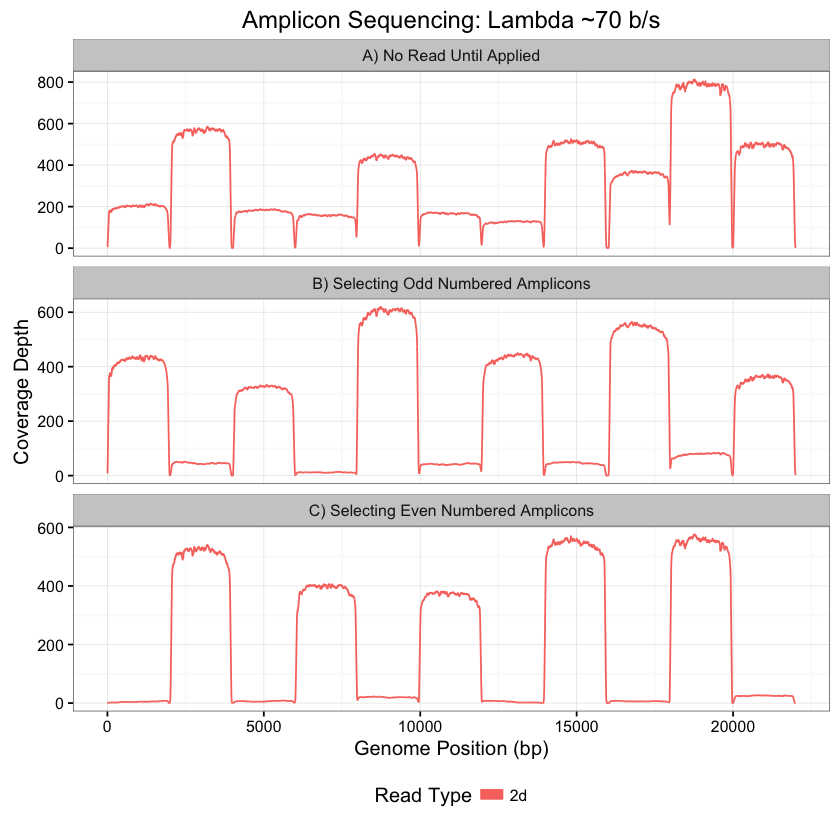

In [25]:
ggplot(data=Amplicons[Amplicons$Type=="2d",],aes(x=Position,y=Depth,color=Type)) + theme_bw()  + geom_line(size=0.5)+ labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "Amplicon Sequencing: Lambda ~70 b/s")   + xlim(0,22000) + facet_wrap(~Experiment,ncol=1,scales="free_y") + scale_colour_discrete(name  = "Read Type") + theme(legend.position="bottom" , legend.key = element_blank() ) + guides(colour = guide_legend(override.aes = list(size=3)))


### Figure 4 - Balancing Sequencing of Amplicons

These figures take as input bam files generated at 1 minute intervals f